In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import cv2
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_dir = pathlib.Path(".\\archive")

In [3]:
data_dir

WindowsPath('archive')

In [4]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('archive/angry/PrivateTest_10131363.jpg'),
 WindowsPath('archive/angry/PrivateTest_10304478.jpg'),
 WindowsPath('archive/angry/PrivateTest_1054527.jpg'),
 WindowsPath('archive/angry/PrivateTest_10590091.jpg'),
 WindowsPath('archive/angry/PrivateTest_1109992.jpg'),
 WindowsPath('archive/angry/PrivateTest_11296953.jpg'),
 WindowsPath('archive/angry/PrivateTest_12000629.jpg'),
 WindowsPath('archive/angry/PrivateTest_12008383.jpg'),
 WindowsPath('archive/angry/PrivateTest_12191716.jpg'),
 WindowsPath('archive/angry/PrivateTest_1221822.jpg'),
 WindowsPath('archive/angry/PrivateTest_12403575.jpg'),
 WindowsPath('archive/angry/PrivateTest_12766285.jpg'),
 WindowsPath('archive/angry/PrivateTest_12846357.jpg'),
 WindowsPath('archive/angry/PrivateTest_1290484.jpg'),
 WindowsPath('archive/angry/PrivateTest_12912780.jpg'),
 WindowsPath('archive/angry/PrivateTest_13164119.jpg'),
 WindowsPath('archive/angry/PrivateTest_13278552.jpg'),
 WindowsPath('archive/angry/PrivateTest_13463625.jpg

In [5]:
len(list(data_dir.glob("*/*.jpg")))

35887

In [6]:
emotion_dict = {
    "angry": list(data_dir.glob("angry/*.jpg")),
    "disgust": list(data_dir.glob("disgust/*.jpg")),
    "fear": list(data_dir.glob("fear/*.jpg")),
    "happy": list(data_dir.glob("happy/*.jpg")),
    "neutral": list(data_dir.glob("neutral/*.jpg")),    
    "sad": list(data_dir.glob("sad/*.jpg")),
    "surprise": list(data_dir.glob("surprise/*.jpg"))
}

In [7]:
label = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

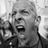

In [8]:
PIL.Image.open(emotion_dict["angry"][7])

In [ ]:
X = []
y = []

for emotion_name, images in emotion_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resize = cv2.resize(img, (100, 100))
        X.append(img_resize)
        y.append(label[emotion_name])

In [ ]:
len(X)

In [ ]:
len(y)

In [ ]:
y[:5]

In [ ]:
X[:5]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0].shape

In [ ]:
y[0]

In [ ]:
plt.axis()
plt.imshow(X[0])

In [ ]:
plt.axis()
plt.imshow(X[39])

In [ ]:
y[39]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
plt.axis("off")
plt.imshow(X_train[0])

In [ ]:
def image_with_tag(index):
    plt.axis("off")
    plt.imshow(X_train[index])
    keys_with_value = []
    for key, value in label.items():
        if value == y_train[index]:
            keys_with_value.append(key)

    print("Label is: {}".format(keys_with_value[0]))

In [ ]:
image_with_tag(50)

In [ ]:
X_train[0].shape

In [ ]:
X.shape

In [ ]:
# Data Augmentation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=50)

In [ ]:
model.evaluate(X_test_scaled, y_test)